# Programación dinamica

In [1]:
import matplotlib.pyplot as plt
# Crear y manejar grafos
import networkx as nx

# Inciso c) Bottom-up para el conjunto independiente máximo

In [2]:
def peso_maximo(w):

    n = len(w)
    OPT = [0] * (n + 1)

    # Casos base
    OPT[0] = 0
    OPT[1] = w[0]

    for i in range(2, n + 1):
        OPT[i] = max(w[i - 1] + OPT[i - 2], OPT[i - 1])

    return OPT

# Inciso d) Reconstrucción del conjunto independiente óptimo

In [3]:
def reconstruccion(w, OPT):
    
    n = len(w)
    i = n
    S = []

    while i >= 1:
        if i == 1:
            S.append(1) # Agregar vértice 1 al conjunto solución
            break
        if w[i - 1] + OPT[i - 2] > OPT[i - 1]:
            S.append(i) # Agregar vértice i al conjunto solución
            i -= 2
        else:
            i -= 1

    return sorted(S) # Devolver en orden creciente

# Muestra gráficamente la instancia de entrada y la solución

In [4]:
def camino(w, solucion):

    n = len(w)
    G = nx.path_graph(n) # Crear grafo camino con n vértices

    pos = {i: (i, 0) for i in range(n)} # Posiciones para dibujar el grafo

    colores = []
    for i in range(1, n + 1):
        if i in solucion:
            colores.append("lightgreen")
        else:
            colores.append("lightgray")

    etiquetas = {i: f"v{i+1}\nw={w[i]}" for i in range(n)}

    plt.figure(figsize=(10, 2))
    nx.draw(
        G,
        pos,
        labels=etiquetas,
        node_color=colores,
        node_size=1500,
        font_size=10
    )
    plt.title("Conjunto independiente máximo en un grafo camino")
    plt.axis("off")
    plt.show()





# Ejemplo de ejecución

Pesos: [2, 7, 1, 8, 3, 4]
OPT: [0, 2, 7, 7, 15, 15, 19]
Vértices seleccionados: [2, 4, 6]
Peso total óptimo: 19


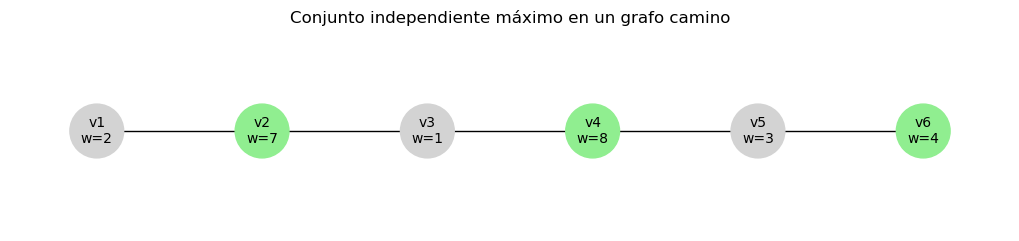

In [5]:
# Pesos de los vértices (instancia de entrada)
w = [2, 7, 1, 8, 3, 4]

OPT = peso_maximo(w)
solucion = reconstruccion(w, OPT)

print("Pesos:", w)
print("OPT:", OPT)
print("Vértices seleccionados:", solucion)
print("Peso total óptimo:", OPT[len(w)])

camino(w, solucion)